<a href="https://colab.research.google.com/github/PVirat/Soil-Classification/blob/main/soil_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dropout, MaxPooling2D, AveragePooling2D, Dense, Flatten, Input, Conv2D, add, Activation
from tensorflow.keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer, BatchNormalization, LocallyConnected2D, ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose, GaussianNoise, UpSampling2D, Input)

from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential , Model , load_model
from tensorflow.keras.preprocessing.image import load_img , img_to_array , ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from PIL import Image
import matplotlib.pyplot as plt

import cv2
from imutils import paths
import numpy as np
import os
import time
import warnings
warnings.filterwarnings("ignore")


In [ ]:
print("Tensorflow version: ",tf.__version__)

Tensorflow version:  2.8.2


In [ ]:
train_dir = '/content/drive/MyDrive/Soil Data/Train'
test_dir = '/content/drive/MyDrive/Soil Data/test'

image_size = 224

In [ ]:
batch_size = 32

train_datagen = ImageDataGenerator(rescale = 1./255,
                            rotation_range=45,
                            zoom_range=0.40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.15,
                            horizontal_flip=True,
                            vertical_flip= True,
                            fill_mode="nearest")

train_data = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=32,class_mode="categorical")

Found 1001 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size=(150,150),
                                            batch_size=32,
                                            class_mode="categorical")

Found 218 images belonging to 4 classes.


Model: "SoilNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 activation (Activation)     (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 50, 50, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        8224      
                                                                 
 activation_1 (Activation)   (None, 50, 50, 32)        0         
                                                           

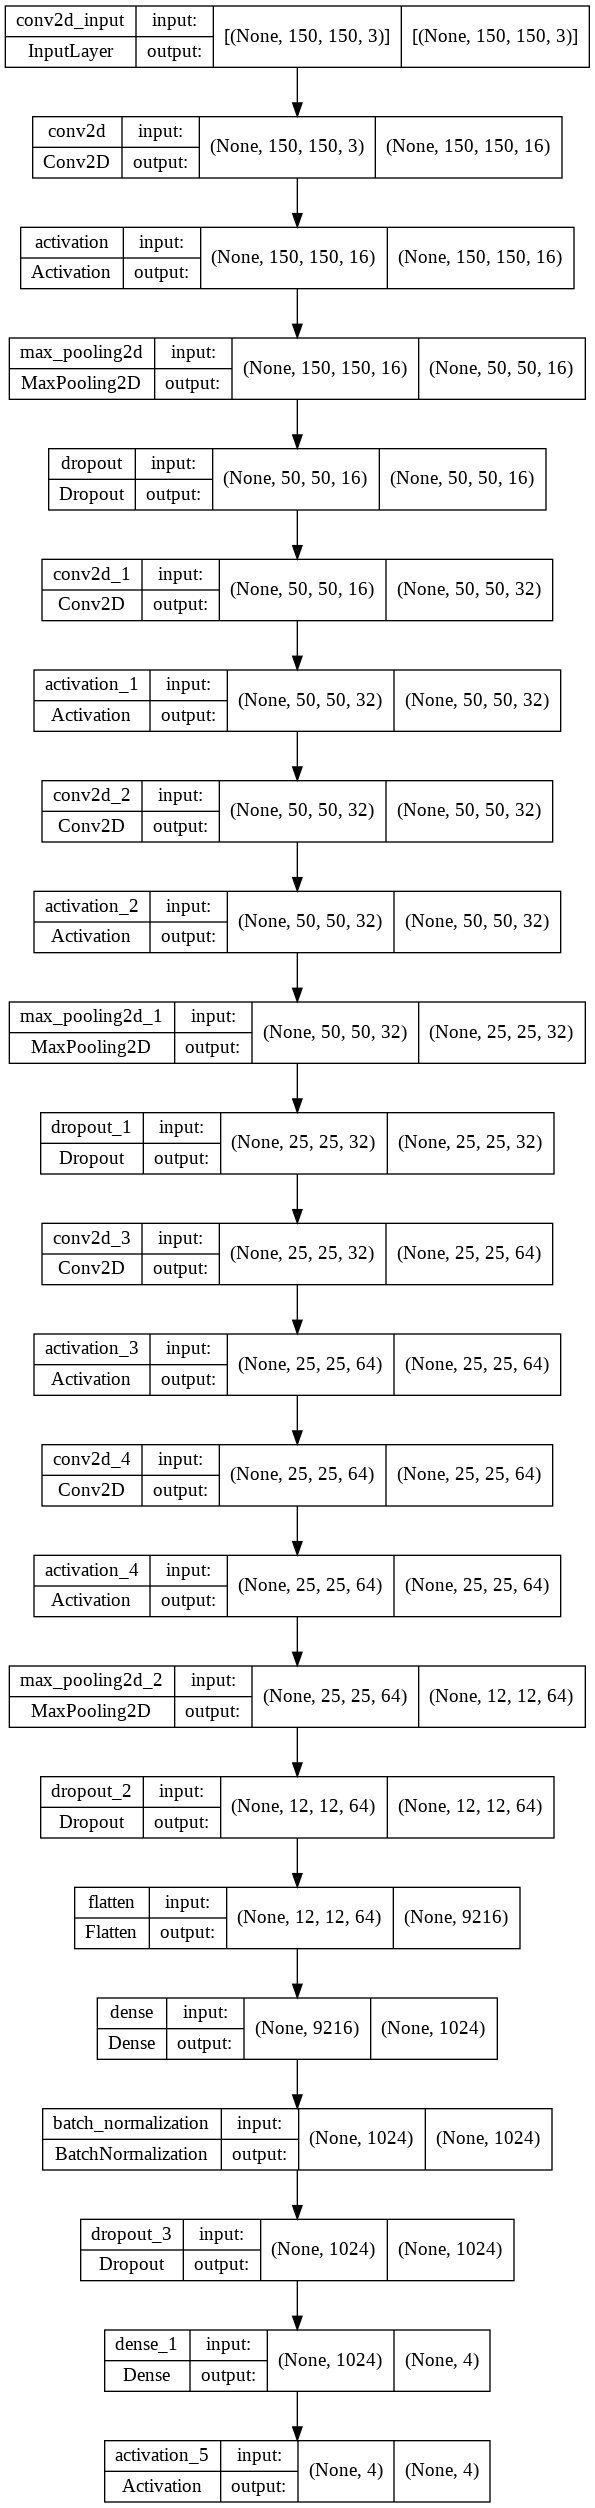

In [ ]:
chanDim = 1
model = Sequential(name="SoilNet")
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(150,150,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (4, 4), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(32, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (4, 4), padding="same"))
model.add(Activation("relu"))

model.add(Conv2D(64, (4, 4), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation("softmax"))


model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
reduction_lr = ReduceLROnPlateau(monitor = "val_accuracy",patience = 5 ,verbose = 1, factor = 0.2, min_lr = 0.0001)
model.summary()
plot_model(model,show_shapes=True)


In [ ]:
callback_list = [reduction_lr]

In [ ]:
#bot_callback = botCallback(access_token)
#plotter = Plotter(access_token)
#callback_list = [bot_callback,plotter] callbacks=callback_list
start = time.time()

history = model.fit_generator(train_data,
                    steps_per_epoch = 30,
                    validation_data = test_data,
                    validation_steps = 30,
                    epochs=20,
                    callbacks = callback_list)
end = time.time()
print("Total train time: ",(end-start)/60," mins")

Epoch 1/20
30/30 [==============================] - 313s 10s/step - loss: 1.9745 - accuracy: 0.6446 - val_loss: 2.7411 - val_accuracy: 0.4083 - lr: 0.0010
Epoch 2/20
30/30 [==============================] - 48s 2s/step - loss: 0.6367 - accuracy: 0.7705 - lr: 0.0010
Epoch 3/20
30/30 [==============================] - 47s 2s/step - loss: 0.4728 - accuracy: 0.8250 - lr: 0.0010
Epoch 4/20
30/30 [==============================] - 47s 2s/step - loss: 0.6019 - accuracy: 0.7641 - lr: 0.0010
Epoch 5/20
30/30 [==============================] - 47s 2s/step - loss: 0.5390 - accuracy: 0.7844 - lr: 0.0010
Epoch 6/20
30/30 [==============================] - 48s 2s/step - loss: 0.6362 - accuracy: 0.7748 - lr: 0.0010
Epoch 7/20
30/30 [==============================] - 47s 2s/step - loss: 0.5773 - accuracy: 0.7876 - lr: 0.0010
Epoch 8/20
30/30 [==============================] - 48s 2s/step - loss: 0.4583 - accuracy: 0.8208 - lr: 0.0010
Epoch 9/20
30/30 [==============================] - 48s 2s/step - lo

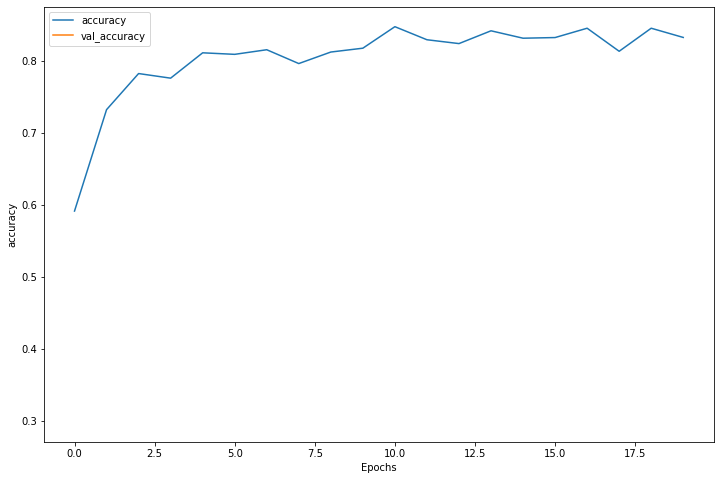

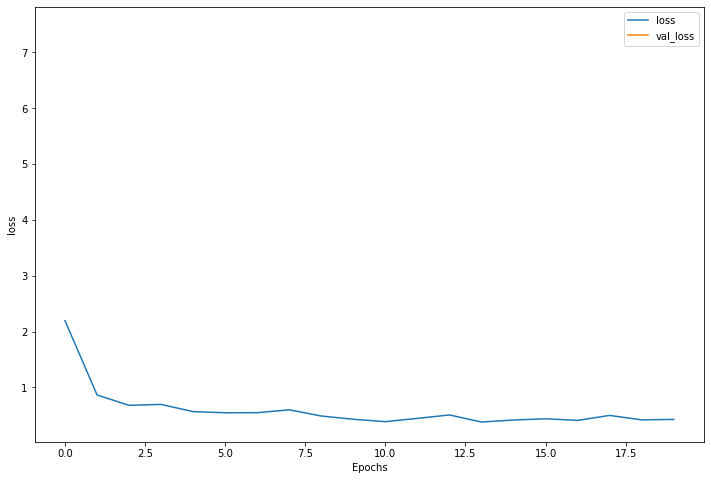

In [ ]:
# def plot_graph(history,string):
#     plt.figure(figsize=(12,8))
#     plt.plot(history.history[string],label=str(string))
#     plt.plot(history.history["val_"+str(string)],label="val_"+str(string))
#     plt.xlabel("Epochs")
#     plt.ylabel(str(string))
#     plt.legend()
#     plt.show()
# plot_graph(history,"accuracy")
# plot_graph(history,"loss")

In [ ]:
model.save("/content/Soil data/Soilclass.h5")

In [ ]:
from IPython.display import FileLink
FileLink('Soilclass.h5')

/content/Soilclass.h5

In [ ]:
from keras.models import load_model
import cv2
import numpy as np

model = load_model('Soilclass.h5')

# model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

# img = cv2.imread('/content/drive/MyDrive/Soil Data/test/test_2/images125.jpg')
# img = cv2.resize(img,(150,150))
# img = np.reshape(img,[150,150,3])

# # classes = model.predict_classes(img)

# # print(classes)
# pred = model.predict(img)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data)
np.argmax(predictions[15])


0

# New Section